# Trabajo práctico integrador

## Introducción
Una variable aleatoria es una función que transforma un conjunto de números aleatorios en una sucesión que se corresponde con una distribución de probabilidad. Por lo tanto, la eficacia de este generador está condicionada por la calidad del generador de números aleatorios. No solo se trata de que los números aleatorios sean probabilísticamente de distribución uniforme e independientes, sino que el generador tenga un ciclo suficientemente amplio para obtener resultados verosímiles, sin que esto signifique que genere un impacto importante en el rendimiento del sistema. Por lo cual, en el siguiente informe nos proponemos analizar dicha influencia de los números aleatorios en la generación de variables aleatorias a partir de estos, desarrollando cada método desde cero y comparando los resultados de múltiples situaciones distintas.

### Objetivos del proyecto
- Desarrollar generadores de variables aleatorias eficaces que cubran un amplio espectro de distribuciones de probabilidad
- Probar la dependencia de estos de la calidad del generador de números aleatorios
- Desarrollar algoritmos que siempre generen variables aleatorias de calidad y de bajo impacto en el sistema

### Alcances del proyecto
El proyecto será desarrollado en su totalidad en Python. Se pueden distinguir las etapas expuestas a continuación.

1. **Desarrollo de generadores de números aleatorios:** Estos se desarrollarán de forma totalmente manual para tener total control de la calidad de los mismos. Se crearán generadores tanto congruenciales lineales como de cuadrados medios. De los primeros se brindará la opción de obtener generadores multiplicativos y mixtos y métodos para probar si son de ciclo completo.

2. **Validación de generadores de números aleatorios:** Se desarrollarán pruebas para validar la uniformidad e independencia estadísticas de las sucesiones de números obtenidas con los generadores antes dichos.

3. **Desarrollo de generadores de variables aleatorias:** Estos transformarán la sucesión de un generador especificado en una sucesión de variables aleatorias según una distribución a elección.

4. **Validación de generadores de variables aleatorias:** Se probarán los generadores de variables aleatorias con distintas sucesiones de números aleatorios para analizar el impacto de la calidad del primero en el segundo. Para esto, se generarán gráficas haciendo uso de la librería matplotlib.

# Implementación en Python

A continuación se explicarán los generadores de números pseudoaleatorios, los generadores de variables aleatorias y las pruebas de aletoriedad implementados en Python.

## Generador de números pseudoaleatorios

Para facilitar la creación de generadores de números pseudoaleatorios a lo largo del trabajo práctico, se decidió abstraer el concepto de *generador de números aleatorios* con la clase `Generator`. Todos los generadores son subclases de `Generator` y deben implementar el método `next()`, el cual retorna el siguiente número aleatorio. También debe implementar  el método `get_xn_sequence()` y el método `get_random_numbers()`, los cuales devuelven la secuencia entera de números pseudoaleatorios $\{\mu_0, \mu_1, \dots, \mu_n\}$ y la secuencia de reales generados $\{x_0, x_1, \dots, x_n\}$ respectivamente. Por último deben implementar el método `verify_parameters()`, que verifica la validez de los parámetros del generador.

Además, todas las subclases de `Generador` cuentan con el método `plot_random_numbers()`, que grafica la secuencia de números pseudoaleatorios en el plano $xy$, donde el eje $x$ representa el índice $i$ del número pseudoaleatorio, y el eje $y$ representa el valor del número psuedoaleatorio $\mu_i$. Éste método admite el parámetro `join_points`, que en el caso de ser verdadero, une los puntos entre los números pseudoaleatorios, facilitando la visualizacion del orden de la secuencia $\mu_1, \mu_2, \dots, \mu_n$ generada.

Las clases concretas que heredan de Generator son:
* `MixedCongruentialGenerator` (generador congruencial lineal mixto)
* `MultiplicativeCongruentialGenerator` (generador congruencial lineal multiplicativo)
* `MiddleSquareGenerator` (generador de cuadrados medios)
Todos se explicarán en mayor profundidad a continuación.

### Generadores congruenciales lineales
`LinearCongruentialGenerator` es una clase abstracta que representa el concepto de *generador congruencial lineal*. Se concreta en dos generadores, a saber, el `MultiplicativeCongruentialGenerator` y el `MixedCongruentialGenerator`.

Los generadores congruenciales lineales se definen denotando la relación recursiva de la siguiente manera: 

$X_{n+1} = \left( a X_n + b \right)\bmod m$

donde $X$ es la secuencia de valores pseudoaleatorios objetivo ($x_0$ es la semilla), $m$ es el módulo, $a$ el elemento multiplicativo y $b$ es el elemento aditivo.

La clase abstracta cuenta con un único método a implementar obligatoriamente: `has_max_sequence()`, que devuelve un booleano que indica si el generador es de ciclo completo. Por su parte, implementa los métodos que hereda de `Generator` y lanza un error si se intenta crear un *Generador* con parámetros inválidos. Por ejemplo, impide que se asigne al elemento multiplicativo un número superior al módulo.

### Generador de cuadrados medios

Los generadores de cuadrados medios serán instancias de la clase `MiddleSquareGenerator`. Su constructor recibe los parámetros:

* $k > 0 $ - es el número de dígitos de los números aleatorios resultantes
* $seed > 0$ - es la semilla o valor inicial

### Ejemplos

#### Ejemplo: Generador congruencial mixto
A continuación se presenta la implementación del siguiente generador:

$X_{n+1} = \left( 4X_n + 7 \right)\bmod 9$

con una semilla de valor 9; se imprime la secuencia de números enteros $x_n$ y se indica si el generador es de ciclo completo.

In [19]:
from src.random_number import MixedCongruentialGenerator

generator = MixedCongruentialGenerator(seed=8,a=4,b=7,m=9)
print(generator.get_xn_sequence())

if(generator.has_max_sequence()):
    print("generador de ciclo completo")
else:
    print("generador de ciclo incompleto")

[8, 3, 1, 2, 6, 4, 5, 0, 7]
generador de ciclo completo


#### Ejemplo: Generador congruencial multiplicativo
Se presenta el generador:

$X_{n+1} =  4X_n\mod 9$

con una semilla de 8, imprimiéndose tanto su secuencia de números enteros como la de reales.


In [17]:
from src.random_number import MultiplicativeCongruentialGenerator

generator = MultiplicativeCongruentialGenerator(seed=8,a=4,m=9)
print("enteros: ", generator.get_xn_sequence())
print("reales: ", generator.get_random_numbers())

enteros:  [8, 5, 2]
reales:  [0.8888888888888888, 0.5555555555555556, 0.2222222222222222]


#### Ejemplo 3: Gráfica de generador de cuadrados medios
Se presenta un generador que obtiene números de dos dígitos decimales y se la imprime en pantalla.
Cabe recordar que el parámetro `join_points` por defecto es verdadero, y que por este motivo los puntos $(i,x_i)$ se unen con una línea.


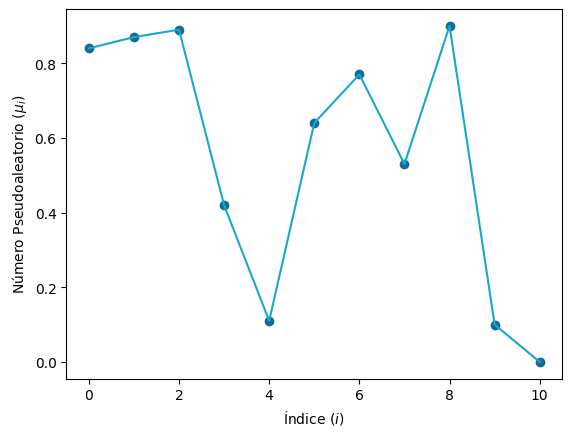

In [18]:
from src.random_number import MiddleSquareGenerator

generator = MiddleSquareGenerator(k=2, seed=84)
generator.plot_random_numbers()

## Pruebas estadísticas para validar la aleatoriedad de las sucesiones
El concepto de estas pruebas es representado con la clase abstracta `RandomnessTest`. Toda prueba tiene un constructor que recibe como parámetros el conjunto de números aleatorios a probar (`random_numbers`) y el estadístico relativo al nivel de significancia con que se realice la prueba (`statistic`) que deberá calculase manualmente. A su vez, todas deben implementar el método `run_test` que utiliza todos estos datos para concluír en la aceptación o rechazo de la hipótesis e imprimir esto en pantalla haciendo uso de látex.

Las pruebas que se proveen son:
**Tests de uniformidad**
* `ChiSquaredTest` (prueba de Chi Cuadrada, de Pearson o de Frecuencias)
* `KolmogorovSmirnovTest` (prueba de Kolmogorov-Smirnov)
**Tests de independencia estadística**
* `WaldWolfowitzRunsTest` (prueba de rachas)


### Prueba de la Chi Cuadrada
La clase `ChiSquaredTest` recibe una lista de números aleatorios denominada `random_numbers`, el número entero `intervals` que representa la cantidad de intervalos en los que se subdivirá el dominio, y `statistic` que es el estadístico correspondiente al nivel de significancia de la prueba. Cabe aclarar que el método `run_test()` solo funciona para un conjunto de números pertenecientes al intervalo $[0,1]$.

#### Ejemplo de aplicación
Con el objetivo de evaluar la eficacia de los distintos generadores congruenciales lineales, utilizaremos la prueba de la Chi Cuadrada para probar su uniformidad.

Evaluaremos un conjunto de generadores de distintos tipos fraccionándolos en 10 intervalos y aplicando un nivel de significancia de 0.50. Todos son generadores de ciclo completo, excepto el segundo que tiene un ciclo de 9.

In [13]:
from src.random_number import MixedCongruentialGenerator
from src.random_number import MultiplicativeCongruentialGenerator
from src.randomness_test import ChiSquaredTest

generators = [
    MixedCongruentialGenerator(seed=3,a=5,b=7,m=64),
    MixedCongruentialGenerator(seed=2,a=4,b=6,m=27),
    MixedCongruentialGenerator(seed=1,a=13,b=11,m=36),
    MultiplicativeCongruentialGenerator(seed=1,a=5,m=37),
    MultiplicativeCongruentialGenerator(seed=5,a=13,m=37)
]

statistics = [62.135,27.179,36.475,36.475,36.475]

for i in range(len(generators)): 
    print("---------------------------------------------------------------------------------")
    print("TEST ", i)
    test = ChiSquaredTest(generators[i].get_random_numbers(), intervals=10, statistic=statistics[i])
    test.run_test()



---------------------------------------------------------------------------------
TEST  0


$\chi^2_0 = \sum_{i=1}^n \frac{({FO}_i - {FE}_i)^2}{{FE}_i} = 0.37499999999999994$

$\chi^2_{(\alpha, k=9)} = 62.135$

$\chi^2_0 <  \chi^2_{(\alpha, k=9)} \Rightarrow$ La hipótesis se acepta.

---------------------------------------------------------------------------------
TEST  1


$\chi^2_0 = \sum_{i=1}^n \frac{({FO}_i - {FE}_i)^2}{{FE}_i} = 1.0000000000000002$

$\chi^2_{(\alpha, k=9)} = 27.179$

$\chi^2_0 <  \chi^2_{(\alpha, k=9)} \Rightarrow$ La hipótesis se acepta.

---------------------------------------------------------------------------------
TEST  2


$\chi^2_0 = \sum_{i=1}^n \frac{({FO}_i - {FE}_i)^2}{{FE}_i} = 0.6666666666666667$

$\chi^2_{(\alpha, k=9)} = 36.475$

$\chi^2_0 <  \chi^2_{(\alpha, k=9)} \Rightarrow$ La hipótesis se acepta.

---------------------------------------------------------------------------------
TEST  3


$\chi^2_0 = \sum_{i=1}^n \frac{({FO}_i - {FE}_i)^2}{{FE}_i} = 0.6666666666666667$

$\chi^2_{(\alpha, k=9)} = 36.475$

$\chi^2_0 <  \chi^2_{(\alpha, k=9)} \Rightarrow$ La hipótesis se acepta.

---------------------------------------------------------------------------------
TEST  4


$\chi^2_0 = \sum_{i=1}^n \frac{({FO}_i - {FE}_i)^2}{{FE}_i} = 0.6666666666666667$

$\chi^2_{(\alpha, k=9)} = 36.475$

$\chi^2_0 <  \chi^2_{(\alpha, k=9)} \Rightarrow$ La hipótesis se acepta.

##### Conclusiones del ejemplo de aplicación
Se observa que todos los estadísticos son inferiores o muy cercanos a uno, lo que les da un amplio espectro de aceptación. Se observa la profunda eficacia de los generadores congruenciales lineales.